## Useful Libraries

In [1]:
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [4]:
lfw_data = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)


In [5]:
lfw_data.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [6]:
print(lfw_data)

{'data': array([[0.27189544, 0.28366014, 0.2875817 , ..., 0.07450981, 0.07712419,
        0.03529412],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0248366 , 0.01568628,
        0.        ],
       ...,
       [0.63529414, 0.64444447, 1.        , ..., 0.03267974, 0.        ,
        0.        ],
       [0.03398693, 0.02222222, 0.02222222, ..., 0.10457516, 0.05098039,
        0.03006536],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), 'images': array([[[0.27189544, 0.28366014, 0.2875817 , ..., 0.2522876 ,
         0.2496732 , 0.2535948 ],
        [0.2248366 , 0.26797387, 0.3006536 , ..., 0.2627451 ,
         0.26666668, 0.27058825],
        [0.2522876 , 0.29542485, 0.33594772, ..., 0.3281046 ,
         0.2875817 , 0.31633988],
        ...,
        [0.07058824, 0.07450981, 0.08627451, ..., 0.09411765,
         0.11503268, 0.06

In [7]:
X = lfw_data.data
print(X.shape)

Z= lfw_data.images
print(Z.shape)

Y= lfw_data.target
print(Y.shape)


(1140, 1850)
(1140, 50, 37)
(1140,)


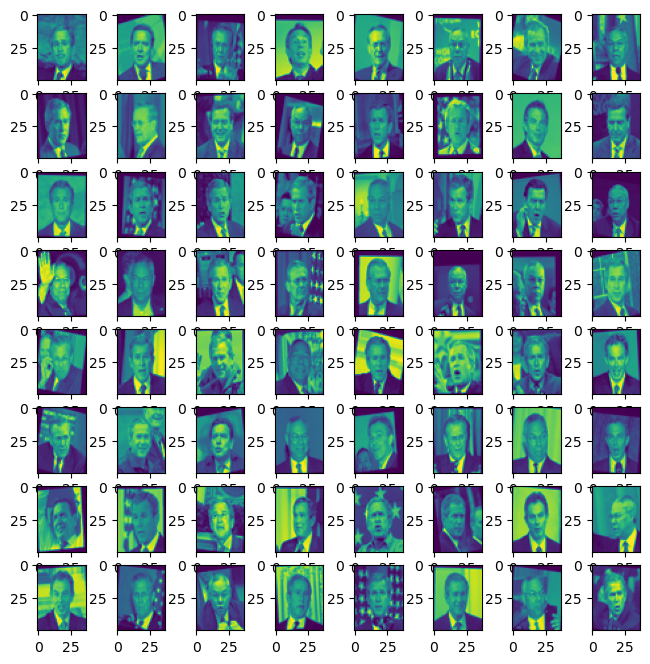

In [8]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(Z[i])
    
plt.show()

## Feature Scaling & Data Splitting

In [10]:
sc = StandardScaler()

X_std = sc.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y)

## SVM Classification withour using PCA

In [11]:
clf1 = SVC()

clf1.fit(X_train, Y_train)

SVC()

In [12]:
# Predictions on Testing data

Y_test_pred = clf1.predict(X_test)
print(Y_test_pred.shape)

print(confusion_matrix(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

(285,)
[[ 44   1  12   0   1]
 [  3   9  18   0   0]
 [  1   0 136   0   0]
 [  1   0   9  10   5]
 [  1   1  10   1  22]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        58
           1       0.82      0.30      0.44        30
           2       0.74      0.99      0.84       137
           3       0.91      0.40      0.56        25
           4       0.79      0.63      0.70        35

    accuracy                           0.78       285
   macro avg       0.83      0.62      0.67       285
weighted avg       0.79      0.78      0.75       285



In [13]:
# Predictions on training data

Y_train_pred = clf1.predict(X_train)
print(Y_train_pred.shape)

print(confusion_matrix(Y_train, Y_train_pred))
print(classification_report(Y_train, Y_train_pred))

(855,)
[[172   0   6   0   0]
 [  2  83   5   0   1]
 [  0   0 393   0   0]
 [  0   0   2  82   0]
 [  0   0   5   0 104]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       1.00      0.91      0.95        91
           2       0.96      1.00      0.98       393
           3       1.00      0.98      0.99        84
           4       0.99      0.95      0.97       109

    accuracy                           0.98       855
   macro avg       0.99      0.96      0.97       855
weighted avg       0.98      0.98      0.98       855



## Performing PCA on Data

In [14]:
pca = PCA()

X_transform = pca.fit_transform(X_train)

In [16]:
pca.components_.shape

(855, 1850)

In [17]:
## Here we will find optimal number of features by keeping 95% of variance in data

total = sum(pca.explained_variance_)
k =0 
current_var = 0


while(current_var/total < 0.95):
    current_var = current_var + pca.explained_variance_[k]
    k = k+1

print("Optimal Value of features that keep 95% of information contained :",k)


Optimal Value of features that keep 95% of information contained : 198


In [18]:
pca = PCA(n_components=198)

X_train_pca = pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

In [19]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(855, 198)
(285, 198)


In [20]:
clf2 = SVC()

clf2.fit(X_train_pca, Y_train)


SVC()

In [21]:
# Predictions on Testing data

Y_test_pred = clf2.predict(X_test_pca)
print(Y_test_pred.shape)

print(confusion_matrix(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

(285,)
[[ 44   1  12   0   1]
 [  4  11  15   0   0]
 [  1   1 135   0   0]
 [  1   0   6  12   6]
 [  2   3   7   1  22]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        58
           1       0.69      0.37      0.48        30
           2       0.77      0.99      0.87       137
           3       0.92      0.48      0.63        25
           4       0.76      0.63      0.69        35

    accuracy                           0.79       285
   macro avg       0.80      0.64      0.69       285
weighted avg       0.79      0.79      0.77       285

